<a href="https://colab.research.google.com/github/Shahabshms/Numerical_Methods_for_ML_and_AI_Solution_1/blob/main/_4301_HW1_Q3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Consider the following univariate optimization problem.
\begin{align}
\text{inf}_a \left[\frac{\exp(a)}{1+\exp(a)}\ln(\frac{\exp(a)}{1+\exp(a)}) + \frac{1}{1+\exp(a)}\ln(\frac{1}{1+\exp(a)}) \right]
\end{align}


1.   Is this a convex optimization problem? Prove your answer.
2. Use gradient descent with a fixed step size to find the global minimum.
3.  Use gradient descent with a fixed step size and numerical approximations of the derivatives to find the global minimum.



In [ ]:
def main_function(x):
  return exp(x)/(1+exp(x)) * log( exp(x)/(1+exp(x)) ) + 1/(1+exp(x)) * log( 1/(1+exp(x)) )

The above optimization problem is not convex, because the function is not convex. We prove its non-convexity by just plotting it. 

It is also easy to find $x,y\in\mathbb{R}$ and $t\in[0,1]$ such that $tf(x) + (1-t)f(y) < f(tx + (1-t)y)$. 

Looking at the plot below, $x = -10$, $y = 0$ and $t = 0.5$ should satisfy the condition.  

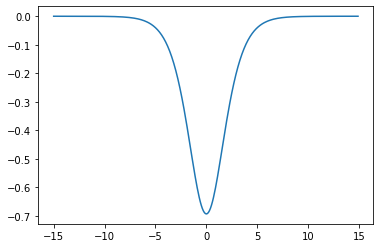

In [ ]:
import matplotlib.pyplot as plt
from math import exp
from math import log
A = [a/10 for a in list(range(-150,150))]
Y = [ main_function(a) for a in A]
plt.plot(A,Y)

For applying gradient decent, we first need to take the gradient, as the following.

\begin{align}
f(a) &= \frac{\exp(a)}{1+\exp(a)}\ln(\frac{\exp(a)}{1+\exp(a)}) + \frac{1}{1+\exp(a)}\ln(\frac{1}{1+\exp(a)})\\
\frac{\partial f(a)}{\partial a} &= \frac{\exp(a)}{(1+\exp(a))^2}\ln(\frac{\exp(a)}{1+\exp(a)}) + \frac{\exp(a)}{1+\exp(a)}\frac{\frac{\exp(a)}{(1+\exp(a))^2}}{\frac{\exp(a)}{1+\exp(a)}} - \frac{\exp(a)}{(1+\exp(a))^2}\ln(\frac{1}{1+\exp(a)}) - \frac{1}{1+\exp(a)}\frac{\frac{\exp(a)}{(1\exp(a))^2}}{\frac{1}{1+\exp(a)}}\\
& = \frac{\exp(a)}{(1+\exp(a))^2}\left(1 + \ln(\frac{\exp(a)}{1+\exp(a)})\right)
- \frac{\exp(a)}{(1+\exp(a))^2}\left(1 + \ln(\frac{1}{1+\exp(a)})\right)\\
& = \frac{\exp(a)}{(1+\exp(a))^2}\left(\ln(\frac{\exp(a)}{1+\exp(a)}) - \ln(\frac{1}{1+\exp(a)})\right)\\
& = \frac{\exp(a)}{(1+\exp(a))^2}\ln(\frac{\frac{\exp(a)}{1+\exp(a)}}{\frac{1}{1+\exp(a)}})\\
 & = \frac{a\exp(a)}{(1+\exp(a))^2}
\end{align}

In [ ]:
def gradient_func(point,method):
  if method == "closed form":
    gradient = point * exp(point) / ((1+exp(point))**2) # This formula comes from the above text cell. 
    return gradient
  if method == "numerical approximation":
    epsilon = 0.00001
    gradient = (main_function(point + epsilon) - main_function(point - epsilon)) / (2*epsilon)
    return gradient

In [ ]:
# This function runs the iterations and updates the answer
def run_gradient_decent(iterations,initial_point,method):
  point = initial_point
  plot_data = []
  gamma = 0.05

  for iteration in range(1,iterations):

    gradient = gradient_func(point,method)
    point = point - gamma*gradient # update with fixed step size gamma

    plot_data.append(main_function(point))

  return [point,plot_data]

In [ ]:
iterations = 1000
initial_point = -4

-0.0007366117449460778


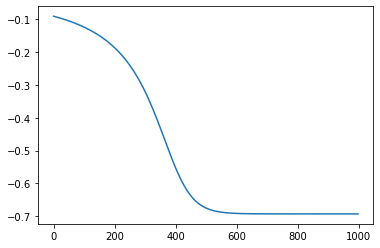

In [ ]:
[best_point,plot_data] = run_gradient_decent(iterations,initial_point,"closed form")
print(best_point)
plt.plot(plot_data)

-0.0007366117584883813


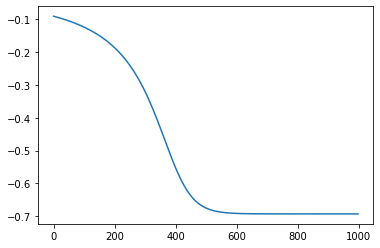

In [ ]:
[best_point,plot_data] = run_gradient_decent(iterations,initial_point,"numerical approximation")
print(best_point)
plt.plot(plot_data)

2) Consider the convex function in cvxnum.py (copy pasted in the next cell). Apply numerical gradient descent to minimize
this function.

In [ ]:
import numpy as np

y = np.array([2.75198506,-5.541184818,14.81934946,-34.65577748,-6.036670701,-27.34074257,-18.67954778,-4.531163389,-8.463598885,-4.806331846,-20.09027547,-107.031734,34.65105681,21.41655864,-83.21746094,114.6194173,-39.13794574,-46.20674128,23.45614046,-33.1974178,14.9144941,17.21773856,-31.70162905,50.95795002,16.3810622,141.5846624,-26.00290094,-63.81808306,-3.997881007,-35.44812169,1.927672422,11.29194311,49.95240821,-37.07117216,51.91237327,3.988664907,-13.45755315,-4.190311669,32.16980277,-21.39186658,-27.15621109,-32.78199277,7.605822107,-3.823710624,39.55301114,136.7265494,30.50586808,-27.2958396,-49.98387647,10.29176928,-0.888796686,61.15207747,-2.93377107,-30.872248,20.36818568,28.34204072,12.58822076,21.5757316,12.1565238,-22.0086202,-27.33346362,-24.70022973,-93.04742143,-18.34721929,-73.60395117,-6.88354133,30.47598778,46.2298951,-2.949254054,112.5905457,134.5806066,-18.76878972,-98.69031293,-26.89823874,19.11223559,93.34615966,21.74126753,1.371608889,-50.80601589,102.3023744,-81.6200239,-53.02613451,-1.38786559,19.31724452,62.22949664,-11.59962601,10.89898815,-41.60449807,12.43963494,-14.95075093,-132.7159906,22.40042227,28.47993159,43.89721204,-8.08636676,18.458018,-64.51597531,-91.89768216,-106.5416773,31.62179325])
y = y.reshape(100,1)

x = np.array([-0.441562979,-2.867852212,3.32754246,0.297456939,0.118744313,-2.86715106,-3.572367747,1.833079153,-2.803440652,1.299079448,-3.72420938,-4.990005819,-0.115143211,1.668385772,-3.803246435,4.758539709,-0.061181562,-2.571238337,3.135911924,-1.202760603,1.803516651,1.319547107,0.714130716,3.496820189,1.824576645,4.8692677,-2.496941136,-4.155768961,3.006229791,-3.583370197,-1.496196276,0.874034001,4.053306072,-3.370604286,4.31616137,1.85687137,-2.396819043,-2.512293371,4.108022322,2.945894242,-3.211600492,1.270053164,1.639682538,2.400075814,1.003447932,4.223580011,0.270249527,-1.198570098,-2.559040844,2.126467948,-2.51080389,2.672435945,1.852885676,2.4668463,-1.160864873,3.77469536,-0.388789202,0.642688253,0.316895859,-1.852164952,0.157728581,-2.955074186,-4.475144574,1.785686388,-4.084418571,0.099530371,-1.839287991,3.50614066,-1.295142073,4.975519024,4.905112152,-1.019948136,-4.353592405,-0.795995688,-1.203947142,4.860510667,-0.868166414,2.345591252,-4.261581233,4.815962089,-4.775863456,-3.591262024,-0.341799269,-0.055436526,3.976465424,-2.309531852,-0.241209759,1.556110905,1.204251858,-2.948187481,-4.727497803,1.100922463,0.199168248,3.621874311,0.480091573,1.803949912,-4.217712908,-4.521561998,-4.619984646,2.423723345])
x = x.reshape(100,1)

def cvx_fn(x):
	smoother = .005
	minq = x-2
	maxq = x+2
	q = x
	best = 1e10
	for j in range(50):
		v,s = env_helper(q)
		best = min(best, v + 1/(2*smoother)*(x-q)*(x-q))
		if (s + 1/smoother*(q-x)) <= 0:
			minq = q
		else:
			maxq = q
		q = (minq+maxq)/2
	return best


def env_helper(q):
	gamma = 100.0
	best = -1e100
	mina = -gamma
	maxa = gamma
	a = 0.0
	slope = a
	for j in range(100):
		loc = np.argmin(y - a*(x-q));
		if - x[loc] + q >= 0:
			mina = a;
		else:
			maxa = a;

		a = (maxa+mina)/2;
		if np.amin(y - a*(x-q)) >= best:
			best = max(best, np.amin(y - a*(x-q)));
			slope = a;
	return best, slope


In [ ]:
def run_gradient_decent_cvx(iterations,initial_point):
  point = initial_point
  plot_data = []
  gamma = 0.01 # You can use a small fixed step size, or you can use other methods that we have seen in Question 2, like diminishing step size. 
  epsilon = 0.00001

  for iteration in range(1,iterations):

    gradient = (cvx_fn(point + epsilon) - cvx_fn(point - epsilon)) / (2*epsilon)
    point = point - gamma*gradient

    plot_data.append(cvx_fn(point))

  return [point,plot_data]

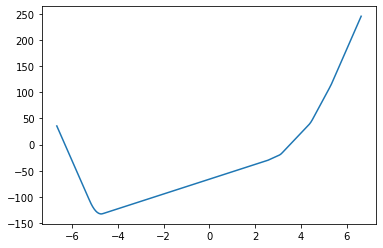

In [ ]:
#Lets cheat a little bit.
X = [x/30 for x in list(range(-200,200))]
Y = [ cvx_fn(x) for x in X]
plt.plot(X,Y)

-4.785486016599122


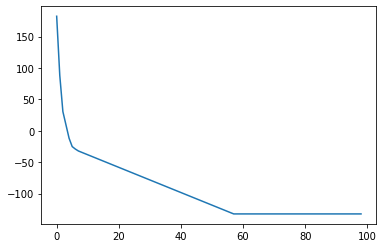

In [ ]:
iterations = 100
initial_point = 7

[best_point,plot_data] = run_gradient_decent_cvx(iterations,initial_point)
print(best_point)
plt.plot(plot_data)